In [167]:
import numpy as np

In [217]:
bar_s = 0.8
theta_x = 0.1

In [218]:
p_1_dom = np.linspace(0, 1, 100)

In [253]:
def get_benefits(theta_x, bar_s, c):

    #  Close solution
    a_1 = (theta_x /2)
    b_1 = -(theta_x/2 + 1)
    c_1 = 1 - bar_s
    
    p_1 = (- b_1 - np.sqrt(b_1 ** 2 - 4 * a_1 * c_1))/( 2 * a_1)
    
    #  Close solution
    a_0 = ((1 - theta_x) /2)
    b_0 = -((1 - theta_x) / 2 + 1  - p_1 * theta_x)
    c_0 = 1 - p_1 * theta_x - bar_s

    p_0 = (- b_0 - np.sqrt(b_0 ** 2 - 4 * a_0 * c_0))/( 2 * a_0)
        
    # benefits given p_0 and p_1
    pi = ( (theta_x ** 2) * (p_1 ** 2 * (1 - 2 * c) + 2 * p_1 * (1 - p_1) * (1 - c) + (1 - p_1)**2 * 0)
          + 2 * (theta_x) * (1 - theta_x) * (p_0 * p_1 * (1 - 2 * c) + p_1 * (1 - p_0) * (1 - c) + p_0 * (1 - p_1) * (- c) + (1 -p_0) * (1 - p_1) * (0) )
          + (1 - theta_x) ** 2 * (p_0 ** 2 * (1 - 2 * c) + p_1 * (1 - p_0) * (1 - c) + p_0 * (1 - p_1) * (- c) + (1 -p_0) * (1 - p_1) * (0) )
         )

    return pi

In [400]:
s_bar = np.linspace(0,1,100)

In [440]:
theta_x = 0.9

In [447]:
c = 0.2

(0.0, 1.0)

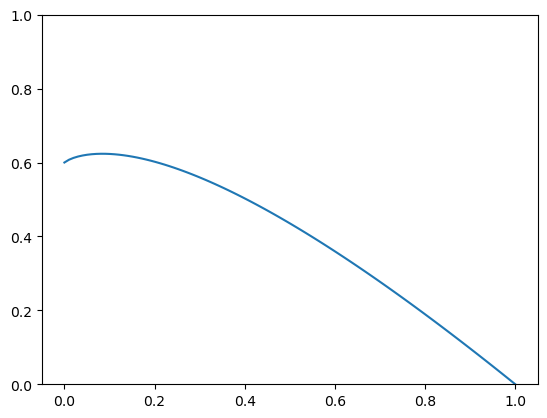

In [448]:
plt.plot(s_bar, [*map(lambda s: get_benefits(theta_x, s, c), s_bar)])
plt.ylim([0,1])